In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.optimize import curve_fit
from scipy.stats import chi2
from __future__ import division

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
def getChiSq(y, y_fit, sigma):
    chi_sq = 0
    for i in range(len(y)):
        chi_sq += ( (y[i] - y_fit[i]) / sigma[i] )**2
    return chi_sq

In [3]:
def getRedChi2(y, y_fit, sigma, numPar=2):
    chi_sq = getChiSq(y, y_fit, sigma)
    red_chi_sq = chi_sq / (len(y) - numPar)
    p = chi2.pdf(chi_sq, df=(len(y) - numPar))
    print 'reduced chi-square =', '%.2f'%(red_chi_sq), 'p-value =', '%.2f'%(p)
    return red_chi_sq

In [4]:
def decay(x, tau, a):
    return a * np.exp(- x / tau)

In [5]:
tau = 2.13

In [6]:
r = np.random.random(80000)
t = - tau * np.log(r)

In [7]:
low = 3
high = 6
bins = 12
binWidth = (high - low) / bins

Text(0.5,1,'Signal (simulation)')

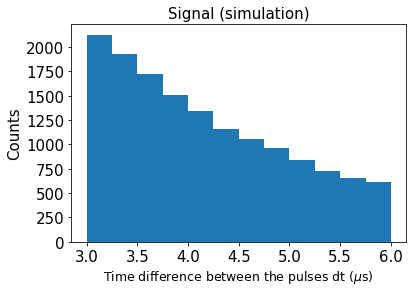

In [8]:
plt.hist(t, bins = bins, range=(low, high))
plt.xlabel('Time difference between the pulses dt ($\mu$s)', fontsize=12.5)
plt.xticks(fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Signal (simulation)', fontsize=15)

In [29]:
y, binEdges = np.histogram(t, bins=bins, range=(low, high))
x = []
for i in range(len(y)):
    x.append((binEdges[i] + binEdges[i+1]) / 2)
x = np.asarray(x)

In [30]:
popt, pcov = curve_fit(decay, x, y, p0=[2, 1e4]) # pcov is the covariance matrix for the fit parameters

print 'Parameters of binned exponential decay fit y = a * exp( -x / tau):'
print ' tau =','%.3f'%(popt[0]),'micro sec'
print ' a =','%.3f'%(popt[1])
print ' error on tau =', '%.4f'%(np.sqrt(pcov[0][0])), 'micro sec'
print ' error on a =', '%.4f'%(np.sqrt(pcov[1][1]))

Parameters of binned exponential decay fit y = a * exp( -x / tau):
 tau = 2.125 micro sec
 a = 9361.093
 error on tau = 0.0281 micro sec
 error on a = 229.9752


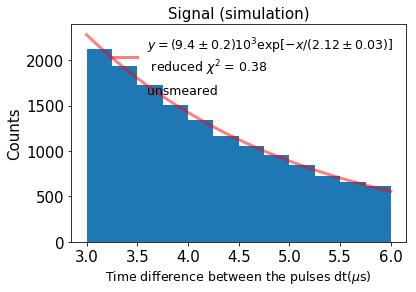

In [31]:
arange = np.arange(low, high+0.05, 0.05)
plt.hist(binEdges[:-1], binEdges, weights=y, label='unsmeared')
plt.plot(arange, decay(arange,popt[0],popt[1]),label=r'$y= (9.4 \pm 0.2) 10^3 \exp[-x/(2.12 \pm 0.03)]$'+' \n reduced $\chi^2$ = 0.38',linewidth=3,alpha=.5,color='r')
plt.xlabel('Time difference between the pulses dt($\mu$s)', fontsize=12.5)
plt.xticks(fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Signal (simulation)', fontsize=15)
plt.legend(prop={'size': 12.5}, frameon=False, loc='upper right')

In [11]:
sigma = np.sqrt(y)
getRedChi2(y, decay(x, popt[0], popt[1]), sigma)

reduced chi-square = 0.38 p-value = 0.04


0.38466770492905217

In [15]:
t_rec = np.random.normal(loc=t, scale=np.asarray(len(t) * [0.005]))

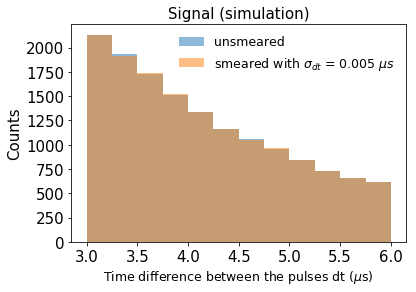

In [32]:
plt.hist(t, bins = bins, range=(low, high), alpha=0.5, label='unsmeared')
plt.hist(t_rec, bins = bins, range=(low, high), alpha=0.5, label='smeared with $\sigma_{dt}$ = 0.005 $\mu s$')
plt.xlabel('Time difference between the pulses dt ($\mu$s)', fontsize=12.5)
plt.xticks(fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Signal (simulation)', fontsize=15)
plt.legend(prop={'size': 12.5}, frameon=False, loc='upper right')

In [33]:
y, binEdges = np.histogram(t_rec, bins=bins, range=(low, high))
x = []
for i in range(len(y)):
    x.append((binEdges[i] + binEdges[i+1]) / 2)
x = np.asarray(x)

In [34]:
popt, pcov = curve_fit(decay, x, y, p0=[2, 1e4]) # pcov is the covariance matrix for the fit parameters

print 'Parameters of binned exponential decay fit y = a * exp( -x / tau):'
print ' tau =','%.3f'%(popt[0]),'micro sec'
print ' a =','%.3f'%(popt[1])
print ' error on tau =', '%.4f'%(np.sqrt(pcov[0][0])), 'micro sec'
print ' error on a =', '%.4f'%(np.sqrt(pcov[1][1]))

Parameters of binned exponential decay fit y = a * exp( -x / tau):
 tau = 2.126 micro sec
 a = 9352.076
 error on tau = 0.0306 micro sec
 error on a = 250.0155


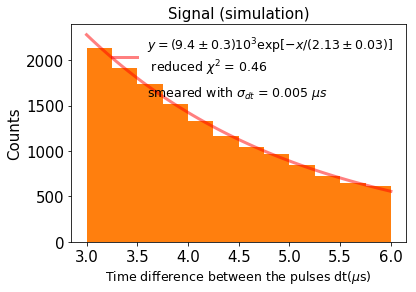

In [35]:
arange = np.arange(low, high+0.05, 0.05)
plt.hist(binEdges[:-1], binEdges, weights=y, color='C1', label='smeared with $\sigma_{dt}$ = 0.005 $\mu s$')
plt.plot(arange, decay(arange,popt[0],popt[1]),label=r'$y= (9.4 \pm 0.3) 10^3 \exp[-x/(2.13 \pm 0.03)]$'+' \n reduced $\chi^2$ = 0.46',linewidth=3,alpha=.5,color='r')
plt.xlabel('Time difference between the pulses dt($\mu$s)', fontsize=12.5)
plt.xticks(fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Signal (simulation)', fontsize=15)
plt.legend(prop={'size': 12.5}, frameon=False, loc='upper right')

In [26]:
sigma = np.sqrt(y)
getRedChi2(y, decay(x, popt[0], popt[1]), sigma)

reduced chi-square = 0.46 p-value = 0.06


0.45586186229806513